In [4]:
source('../helpfuncs/BADS-HelperFunctions.R')

In [5]:
loans = get.loan.dataset(fpath='../data/Loan_Data.csv')


,YOB,nKIDS,nDEP,PHON,dINC_SP,EMPS_A,dINC_A,RES,dHVAL,dMBO,dOUTM,dOUTL,dOUTHP,dOUTCC,BAD,YOB_missing
1,19,4,0,yes,0,R,0,O,14464,4,0,0,0,0,GOOD,0
2,41,2,0,yes,0,P,36000,O,0,0,280,664,0,80,GOOD,0
3,66,0,0,yes,0,N,30000,N,0,0,0,0,0,0,GOOD,0
4,51,2,0,yes,0,P,464,O,24928,8464,584,320,0,60,GOOD,0
5,65,0,0,yes,0,P,15000,P,0,0,0,0,0,0,GOOD,0
6,42,2,0,yes,10500,E,48000,O,43392,46464,1120,0,0,0,GOOD,0


In [13]:
loans = loans[sample(nrow(loans)),] # shuffle the loans
bound = floor(nrow(loans)*0.6) 
train = loans[1:bound,]
test  = loans[(bound+1):nrow(loans),]


[1] 490  16

In [14]:
glm_model = glm(BAD ~ ., data=train, family=binomial)

In [16]:
summary(glm_model)


Call:
glm(formula = BAD ~ ., family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6175  -0.7593  -0.6293   0.6696   2.2771  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)   9.804e-01  8.575e-01   1.143 0.252899    
YOB          -1.969e-02  9.709e-03  -2.028 0.042510 *  
nKIDS         3.651e-02  1.009e-01   0.362 0.717551    
nDEP          1.586e-01  3.996e-01   0.397 0.691425    
PHONyes      -1.962e-01  3.176e-01  -0.618 0.536675    
dINC_SP      -6.104e-05  2.461e-05  -2.481 0.013117 *  
EMPS_AE      -1.979e-01  5.886e-01  -0.336 0.736781    
EMPS_AM       2.293e-01  7.870e-01   0.291 0.770796    
EMPS_AN      -1.346e+01  8.827e+02  -0.015 0.987838    
EMPS_AP      -5.262e-01  5.278e-01  -0.997 0.318850    
EMPS_AR      -4.690e-01  6.809e-01  -0.689 0.490933    
EMPS_AT      -5.171e-01  6.157e-01  -0.840 0.400953    
EMPS_AU       4.950e-01  1.388e+00   0.357 0.721431    
EMPS_AV      -3.296e-01 

In [17]:
preds.glm = predict(glm_model, test, type=c("response")) # in econometrics this is 'y_hat'
head(preds.glm)

284       368       773       633       236       475 
0.3148619 0.2575266 0.2675409 0.2687212 0.4736688 0.5519799

In [22]:
y_t = as.numeric(test$BAD)-1 # in econometrics notation this is simply 'y'
SSE.glm = sum(0.5*(y_t-preds.glm)^2)
print(paste('SSE.glm:',SSE.glm))

[1] "SSE: 47.5973200560723"


In [54]:
library(rpart)
dt_model = rpart(BAD ~ ., data=train, method='class')
preds.dt = predict(dt_model, test)[,2]
SSE.dt = sum(0.5*(y_t-preds.dt)^2)
print(paste('SSE.dt:',SSE.dt))

[1] "SSE.dt: 48.7774838404864"


In [55]:
dtfull_model = rpart(BAD ~ ., data=train, method='class', control=rpart.control(minsplit=3,cp=0.0))
preds.dtfull = predict(dtfull_model, test)[,2]
SSE.dtfull = sum(0.5*(y_t-preds.dtfull)^2)
print(paste('SSE.dt:',SSE.dtfull))

[1] "SSE.dt: 90.5756009070295"


In [34]:
library(caret) # machine learning library ala scikit learn
# install.packages('e1071')
library(e1071)

In [60]:
tau = 0.5 # will control the number of good/bad predictions
preds.glm_discrete = ifelse(preds.glm < tau, 0, 1)
preds.dt_discrete = ifelse(preds.dt < tau, 0, 1)
preds.dtfull_discrete = ifelse(preds.dtfull < tau, 0, 1)

# confusion matrix, you can also use table(), but does not give all the other stats
confusionMatrix(data = preds.glm_discrete, reference = y_t)
confusionMatrix(data = preds.dt_discrete, reference = y_t)
confusionMatrix(data = preds.dtfull_discrete, reference = y_t)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 330 119
         1  23  18
                                        
               Accuracy : 0.7102        
                 95% CI : (0.6678, 0.75)
    No Information Rate : 0.7204        
    P-Value [Acc > NIR] : 0.7118        
                                        
                  Kappa : 0.0843        
 Mcnemar's Test P-Value : 1.558e-15     
                                        
            Sensitivity : 0.9348        
            Specificity : 0.1314        
         Pos Pred Value : 0.7350        
         Neg Pred Value : 0.4390        
             Prevalence : 0.7204        
         Detection Rate : 0.6735        
   Detection Prevalence : 0.9163        
      Balanced Accuracy : 0.5331        
                                        
       'Positive' Class : 0             
                                        

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 318 101
         1  35  36
                                          
               Accuracy : 0.7224          
                 95% CI : (0.6805, 0.7617)
    No Information Rate : 0.7204          
    P-Value [Acc > NIR] : 0.4829          
                                          
                  Kappa : 0.1919          
 Mcnemar's Test P-Value : 2.494e-08       
                                          
            Sensitivity : 0.9008          
            Specificity : 0.2628          
         Pos Pred Value : 0.7589          
         Neg Pred Value : 0.5070          
             Prevalence : 0.7204          
         Detection Rate : 0.6490          
   Detection Prevalence : 0.8551          
      Balanced Accuracy : 0.5818          
                                          
       'Positive' Class : 0               
                                          

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 256  87
         1  97  50
                                          
               Accuracy : 0.6245          
                 95% CI : (0.5799, 0.6675)
    No Information Rate : 0.7204          
    P-Value [Acc > NIR] : 1.000           
                                          
                  Kappa : 0.0882          
 Mcnemar's Test P-Value : 0.507           
                                          
            Sensitivity : 0.7252          
            Specificity : 0.3650          
         Pos Pred Value : 0.7464          
         Neg Pred Value : 0.3401          
             Prevalence : 0.7204          
         Detection Rate : 0.5224          
   Detection Prevalence : 0.7000          
      Balanced Accuracy : 0.5451          
                                          
       'Positive' Class : 0               
                                          

In [56]:
print('Total Classification')
(table(loans$BAD)-1) / length(loans$BAD)

[1] "Total Classification"



     GOOD       BAD 
0.7355102 0.2628571 

                H       Gini       AUC      AUCH        KS       MER       MWL
glm    0.10515430 0.26670251 0.6333513 0.6608011 0.2437708 0.2734694 0.3046397
dt     0.07071909 0.20028535 0.6001427 0.6130870 0.1968322 0.2775510 0.3235485
dtfull 0.01296938 0.09538678 0.5476934 0.5525630 0.1012800 0.2795918 0.3620408
       Spec.Sens95 Sens.Spec95
glm    0.093484419   0.1021898
dt     0.007330028   0.2553933
dtfull 0.589474976   0.2536536


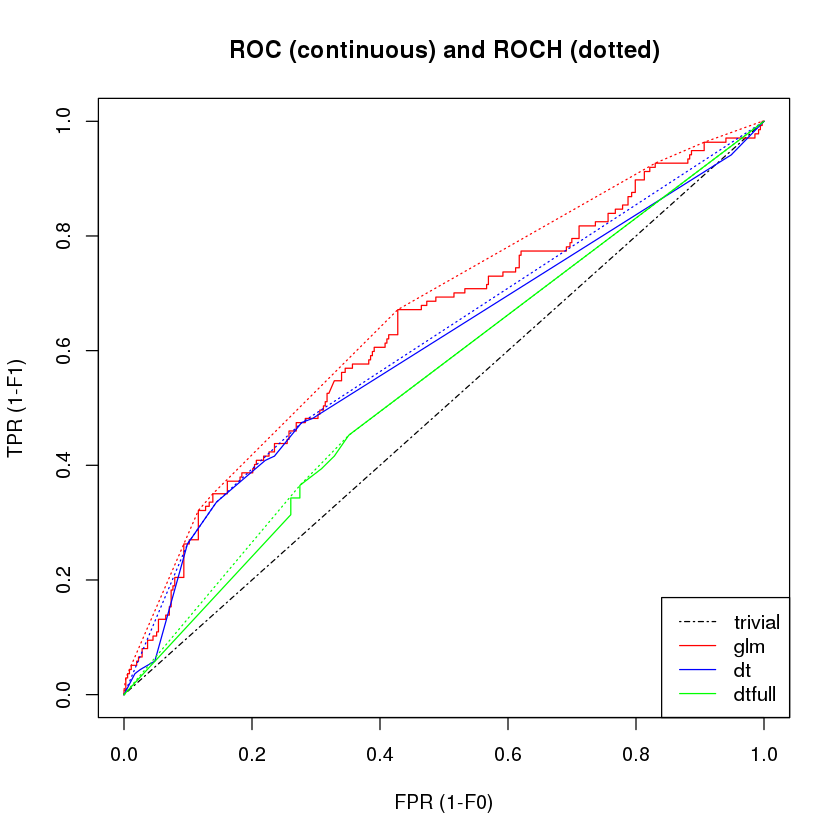

In [74]:
#install.packages('hmeasure')
library(hmeasure)
preds_df = data.frame(glm=preds.glm, dt = preds.dt, dtfull=preds.dtfull)
h = HMeasure(y_t, preds_df)
plotROC(h, which=1) # 'which' is the type of graph
# str(h) # show the structure of the model
#h$metrics['AUC']
summary(h)

### k-Fold cross validation

In [ ]:
# which() # this function returns the list of indexes